In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
####根据投资金额大小对各个省市进行描色,在moneyClass中新增平均投资金额一列
cmap = plt.cm.YlOrRd
Data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
dataCij = pd.read_excel('E:/vcdata/data/CijClass(2000-2017).xlsx')
city = Data['City'].values
City = dataCij['city'].values

dataPOP=Data.iloc[:,3+27*5:21+27*5]###获取POP的数据
dataGDP=Data.iloc[:,22+27*5:40+27*5]###获取GDP的数据
dataAmount = Data.iloc[:,12:30]###投资金额
dataTimes = Data.iloc[:,12+27:30+27]###投资次数
sumP=dataPOP.sum(axis=1).values
sumG=dataGDP.sum(axis=1).values
sumA=dataAmount.sum(axis=1).values
sumT=dataTimes.sum(axis=1).values

In [3]:
dataPOP[0:1]

,2000Pop,2001Pop,2002Pop,2003Pop,2004Pop,2005Pop,2006Pop,2007Pop,2008Pop,2009Pop,2010Pop,2011Pop,2012Pop,2013Pop,2014Pop,2015Pop,2016Pop,2017Pop
0,14.8,14.0,19.0,14.0,14.0,14.0,17.23,25.7,27.1,28.5,28.5,28.21,28.51,33.5,37.85,36.59,55.0,55.0


In [4]:
#### 得到过滤后的127个城市的总的GDP\amount
C_POP = []###保存过滤后的城市的人口、gddp、投资金额
C_amount = []
C_GDP = []
C_times = []
for c in City:
    have = 0###标值城市是否存在
    for i in range(len(city)):
        if city[i]== c:
            C_POP.append(sumP[i]/2)
            C_amount.append(sumA[i]/(68*2))
            C_GDP.append(sumG[i]/(850000*2))
            C_times.append(sumT[i]/2)
            have=1
    if have == 0:
        C_POP.append(0)
        C_amount.append(0)
        C_GDP.append(0)
        C_times.append(0)

In [5]:
### 将其记录再分组里面
dataCij['sumPOP'] = C_POP
dataCij['sumAmount'] = C_amount
dataCij['sumGDP'] = C_GDP
dataCij['sumTimes'] = C_times

In [6]:
dataCij_A = dataCij.sort_values(by="sumAmount" , inplace=False, ascending=False)
dataCij_T = dataCij.sort_values(by="sumTimes" , inplace=False, ascending=False)
dataCij_G = dataCij.sort_values(by="sumGDP" , inplace=False, ascending=False)

In [7]:
import seaborn as sns  #用于绘制热图的工具包
vv = np.arange(1,27)
a=list(sns.color_palette("hls", 26))
yj_colorA={1:a[15],2:'#FF9933',3:(0.86, 0.3712, 0.33999999999999997)}###让times显示不同的颜色
yj_colorT={3:a[15],2:'#FF9933',1:(0.86, 0.3712, 0.33999999999999997)}###让times显示不同的颜色
yj_colorG={1:a[15],3:'#FF9933',2:(0.86, 0.3712, 0.33999999999999997)}###让times显示不同的颜色


def picMap(dataCij,name1,name2):####现在在用
    fig=plt.figure(figsize=(9,7))
    ax=fig.add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    m3= Basemap(llcrnrlon=80, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m3.readshapefile("E:/文档系列/python 系列/TheData/china-shapefiles-master/china-shapefiles-master/china", 'china', drawbounds=True)
    x21 = dataCij['Latitude'].values
    y21 = dataCij['Longitude'].values
    z21=dataCij[name1].values###读取sumTimes列
    x22 = [x21[i*5]-3 for i in range(5)]
    y22 = [y21[10]-35 for i in range(5)]###amount:35,times:39,gdp:24
    cluster = dataCij[name2].values###读取clusterT列
    X21, Y21 = m3(y21, x21)
    for i in range(len(x21)):    
        m3.scatter(X21[i],Y21[i],s=z21[i],color=yj_colorT[cluster[i]], edgecolors='black')###times改为yj_color2
    ###比例尺
#     m3.drawcoastlines()
#     m3.drawmapscale(84., 20, 0.25, 39.5, 500, barstyle='fancy')
    X22, Y22 = m3(y22, x22)
#     for mm in range(4): ###amount
#         plt.scatter(X22[0]-300000,Y22[4]-1900000+300000*mm,s=z21[(mm+1)*10],color='w',edgecolors='black')
#         plt.text(X22[0]-200000,Y22[4]-1940000+300000*mm,'≤{}'.format("%.0f" % z21[(mm+1)*10]),size=14)
#     plt.text(X22[0]-380000,Y22[4]-1970000+350000*4,'amount',size=14)#(M/RMB)
#     plt.text(X22[0]-380000,Y22[4]-2170000+350000*4,'(M/RMB)',size=14)
#     m3.drawmapscale(92., 19, 0.25, 39.5, 1000, barstyle='fancy',fontsize=14)

    for mm in range(4): ###times
        plt.scatter(X22[0]-480000,Y22[4]-1500000+300000*mm,s=z21[(mm+1)*10],color='w',edgecolors='black')
#         print(z21[(mm+2)*10])
        plt.text(X22[0]-360000,Y22[4]-1540000+300000*mm,'≤{}'.format("%.0f" % z21[(mm+1)*10]),size=14)
    plt.text(X22[0]-790000,Y22[4]-1770000+350000*4,'# investments',size=14)
    m3.drawmapscale(95., 19, 0.25, 39.5, 1000, barstyle='fancy',fontsize=14)
    
#     for mm in range(4): ###GDP
#         plt.scatter(X22[0]+850000,Y22[4]-1400000+300000*mm,s=z21[(mm+1)*10],color='w',edgecolors='black')
# #         print(z21[(mm+2)*10])
#         plt.text(X22[0]+1100000,Y22[4]-1440000+300000*mm,'≤{}'.format("%.0f" % z21[(mm+2)*10]),size=14)
#     plt.text(X22[0]+800000,Y22[4]-1600000+350000*4,'GMP',size=14)#(M/RMB)
#     plt.text(X22[0]+800000,Y22[4]-1770000+350000*4,'(M/RMB)',size=14)
#     m3.drawmapscale(95., 19.5, 0.25, 39.5, 1000, barstyle='fancy',fontsize=14)
    
#     plt.savefig('E:/vcdata/pic/picSC/Fig3a_Amount.pdf', bbox_inches='tight')#保存图片
#     plt.savefig('E:/vcdata/pic/picSC/Fig3b_times.pdf', bbox_inches='tight')#保存图片
#     plt.savefig('E:/vcdata/pic/picSC/Fig3c_GDP.pdf', bbox_inches='tight')#保存图片
    plt.savefig('E:/0论文/0picture/4_90b.png',dpi=500, bbox_inches='tight')
    plt.show()
    

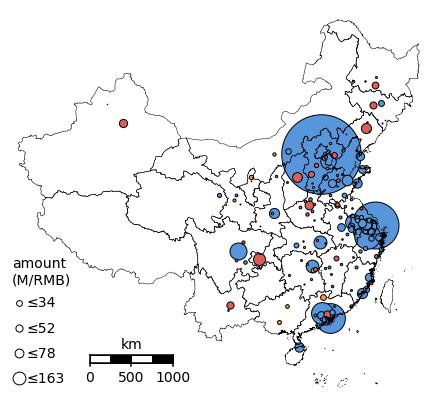

In [8]:
### amount ###
picMap(dataCij_A,'sumAmount','clusterA3')

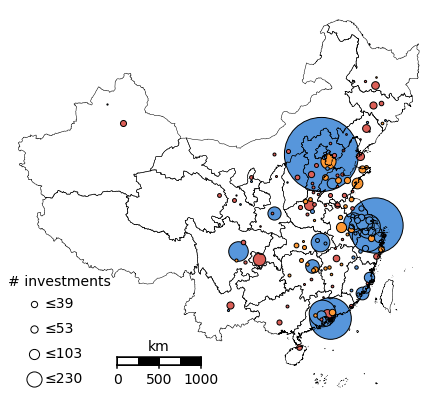

In [17]:
picMap(dataCij_T,'sumTimes','clusterT3')

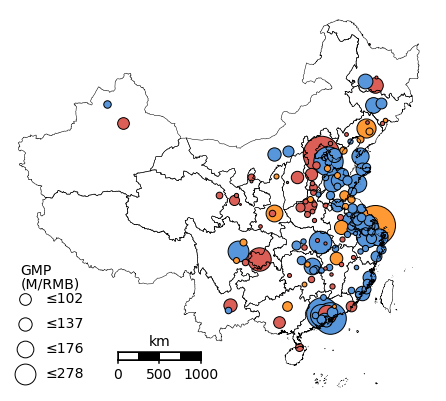

In [15]:
picMap(dataCij_G,'sumGDP','clusterG3')